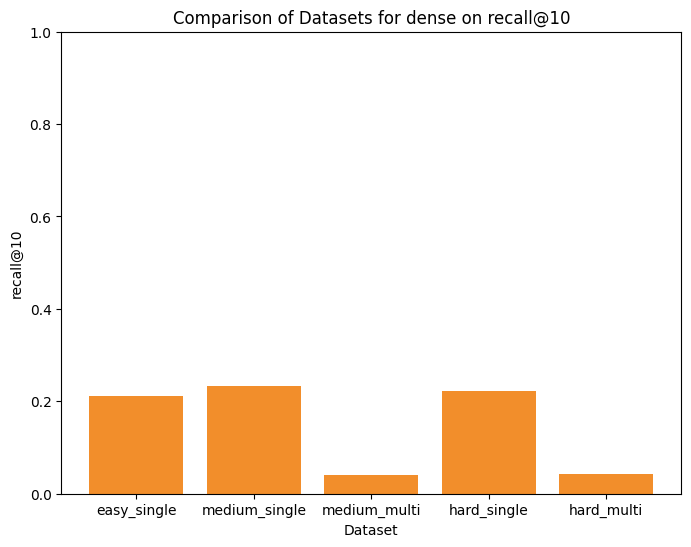

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# load the results from json file
import json
import os

PM_PATH = "../performance"
# save the results to a JSON file.
save_path = os.path.join(PM_PATH, "retrieval_performance_results.json")
with open(save_path, "r") as f:
    results = json.load(f)


# --------------------------
# MANUAL SETTINGS:
# --------------------------
# Set the comparison mode:
# "models" - compare different retrieval methods (models) for a single dataset.
# "datasets" - compare different datasets for a single retrieval method.
comparison_mode = "models"  # Options: "models" or "datasets"
comparison_mode = "datasets"  # Options: "models" or "datasets"
# Set the metric to compare (e.g., "recall@5", "precision@5", "mrr", "ndcg@5").
selected_metric = "recall@10"

if comparison_mode == "models":
    # For comparing models, choose one dataset:
    selected_dataset = "easy_single"  # Change as needed.
    
    # Filter results for the chosen dataset.
    filtered = [r for r in results if r["data_set"] == selected_dataset]
    if not filtered:
        print(f"No results found for dataset: {selected_dataset}")
    else:
        # Extract retrieval methods and metric values.
        x_labels = [r["retrieval"] for r in filtered]
        y_values = [r["performance"][selected_metric] for r in filtered]
        
        plt.figure(figsize=(8, 6))
        plt.bar(x_labels, y_values, color="#4E79A7")
        plt.title(f"Comparison of Models on {selected_dataset} for {selected_metric}")
        plt.xlabel("Retrieval Method")
        plt.ylabel(selected_metric)
        plt.ylim(0, 1)
        plt.show()

elif comparison_mode == "datasets":
    # For comparing datasets, choose one retrieval method:
    selected_method = "dense"  # Change as needed.
    
    # Filter results for the chosen retrieval method.
    filtered = [r for r in results if r["retrieval"] == selected_method]
    if not filtered:
        print(f"No results found for retrieval method: {selected_method}")
    else:
        # Extract dataset names and metric values.
        x_labels = [r["data_set"] for r in filtered]
        y_values = [r["performance"][selected_metric] for r in filtered]
        
        plt.figure(figsize=(8, 6))
        plt.bar(x_labels, y_values, color="#F28E2B")
        plt.title(f"Comparison of Datasets for {selected_method} on {selected_metric}")
        plt.xlabel("Dataset")
        plt.ylabel(selected_metric)
        plt.ylim(0, 1)
        plt.show()
else:
    print("Please set comparison_mode to either 'models' or 'datasets'.")


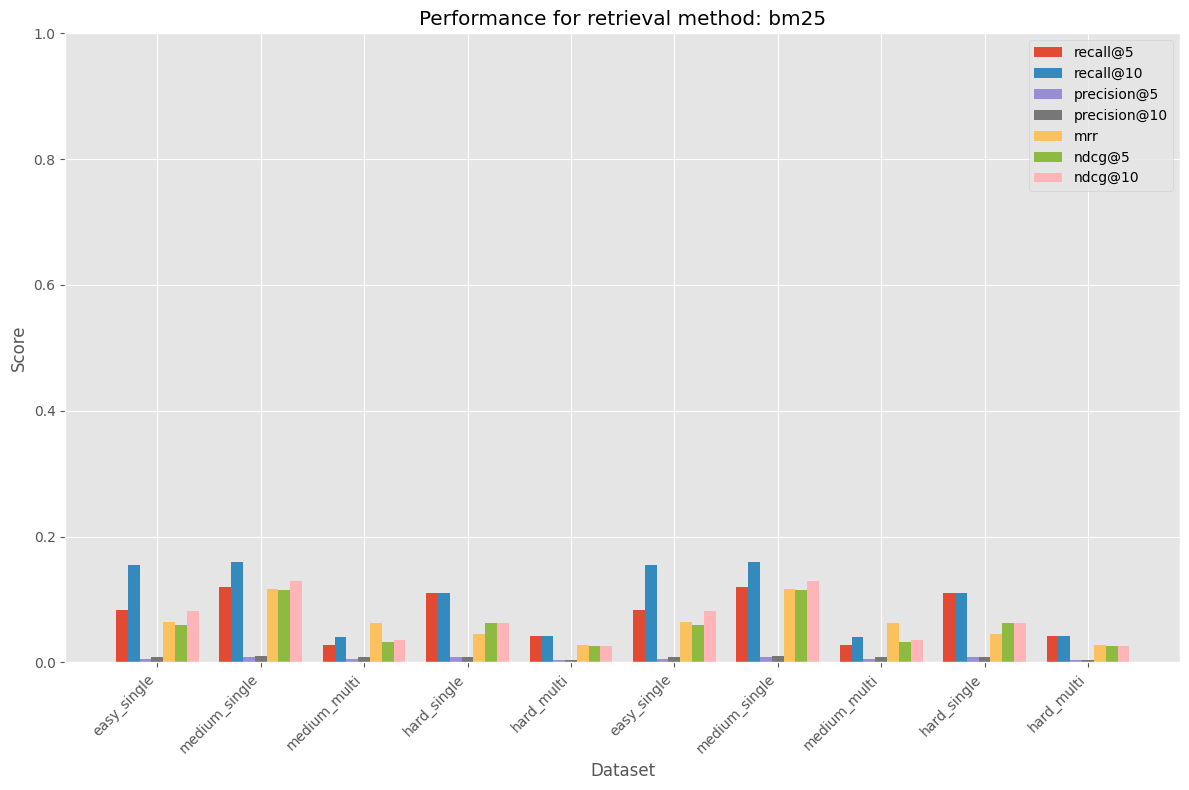

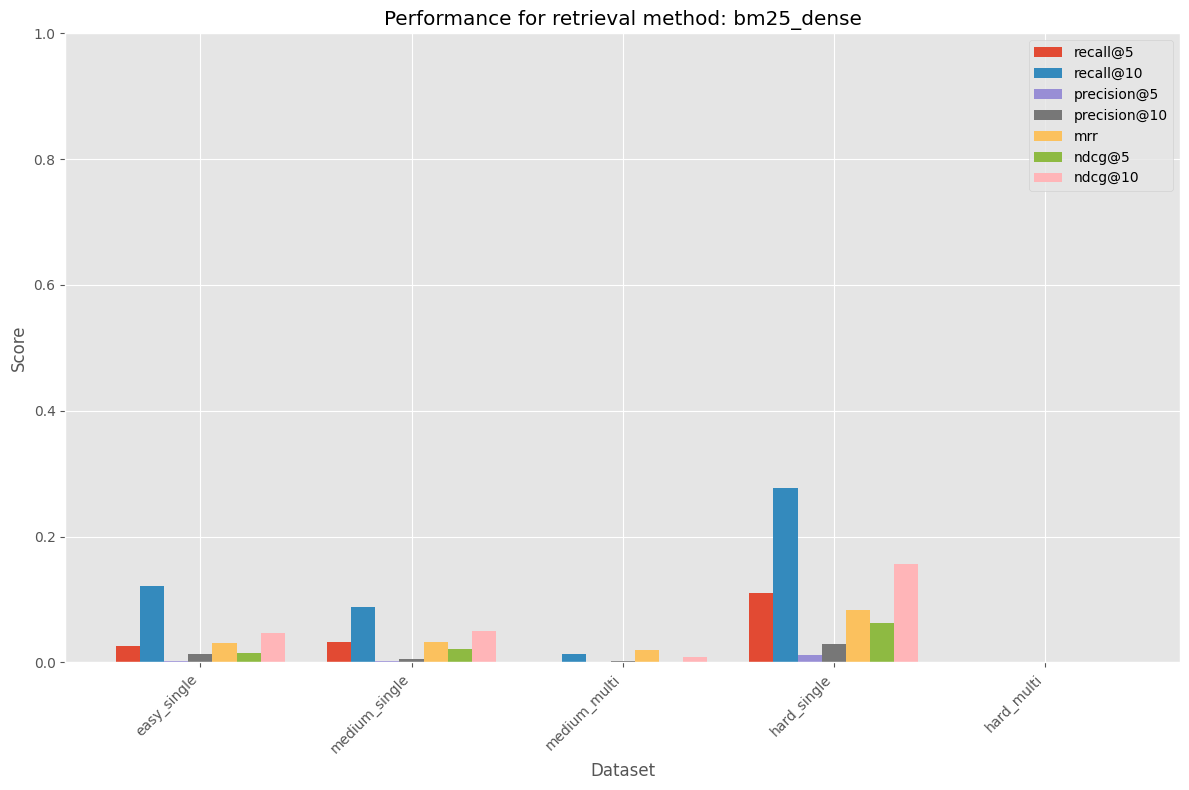

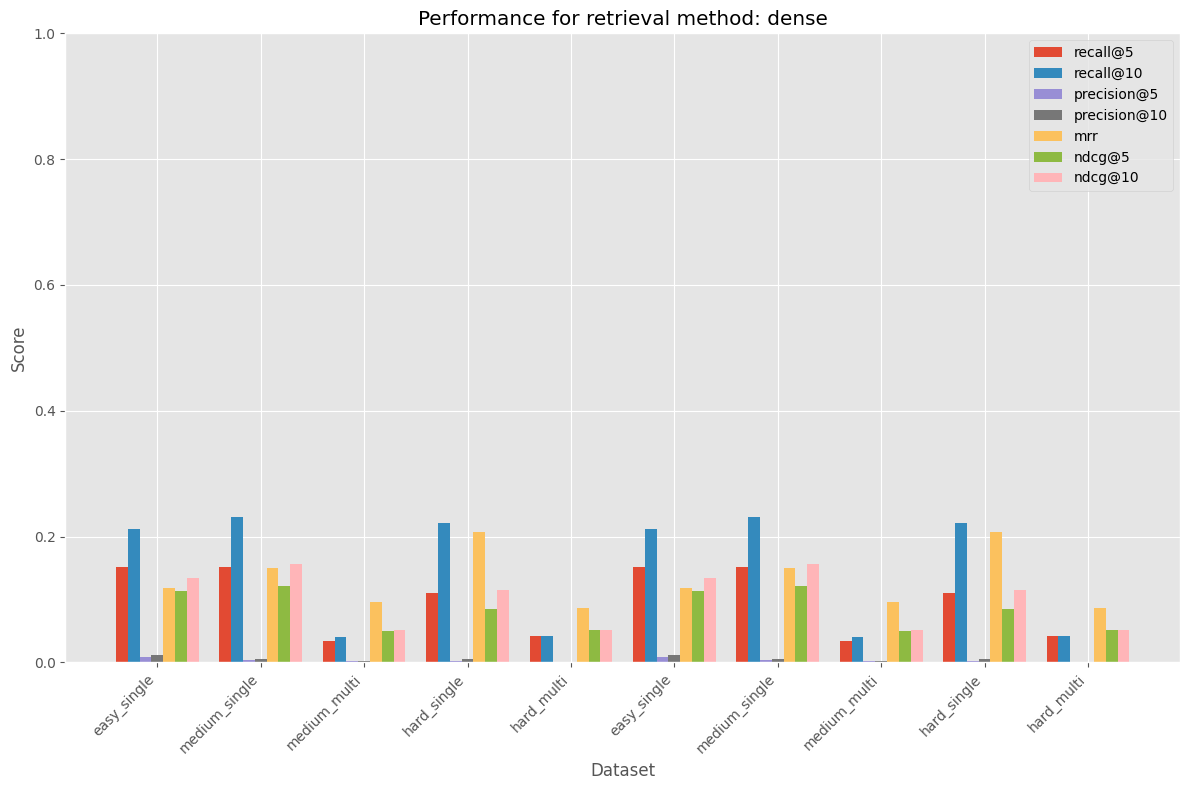

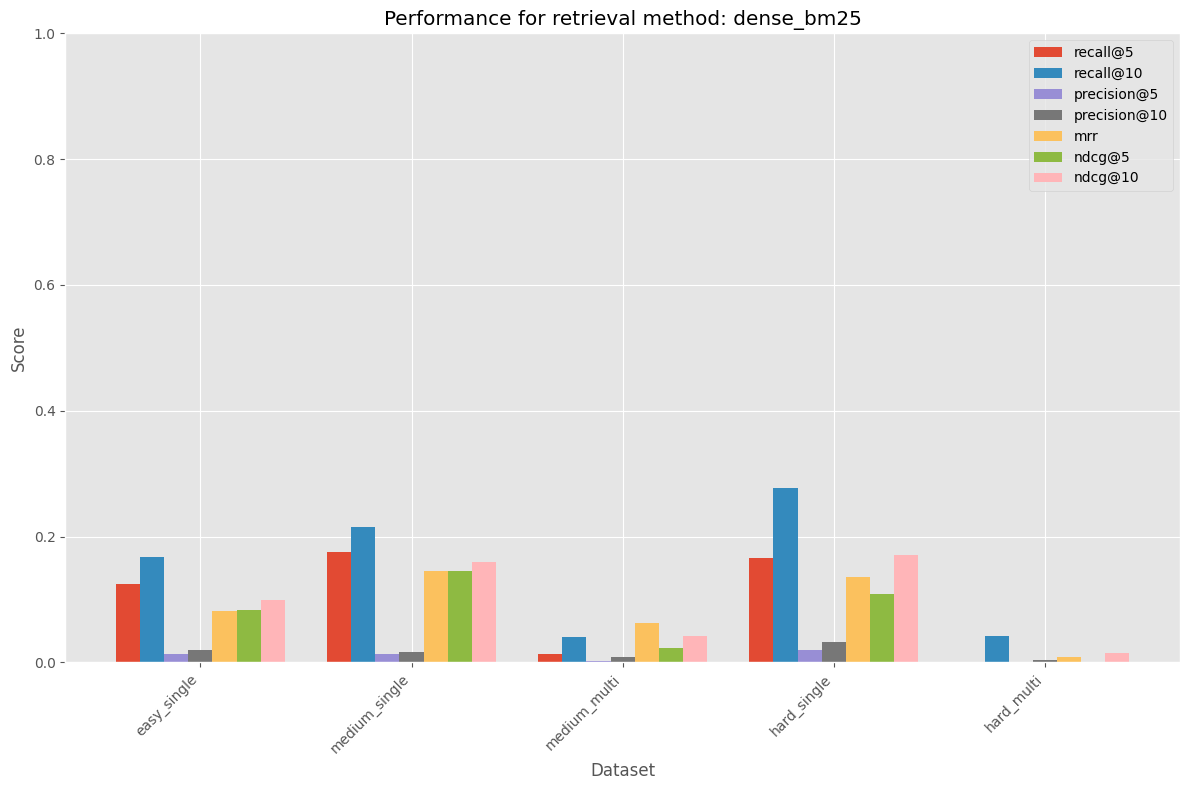

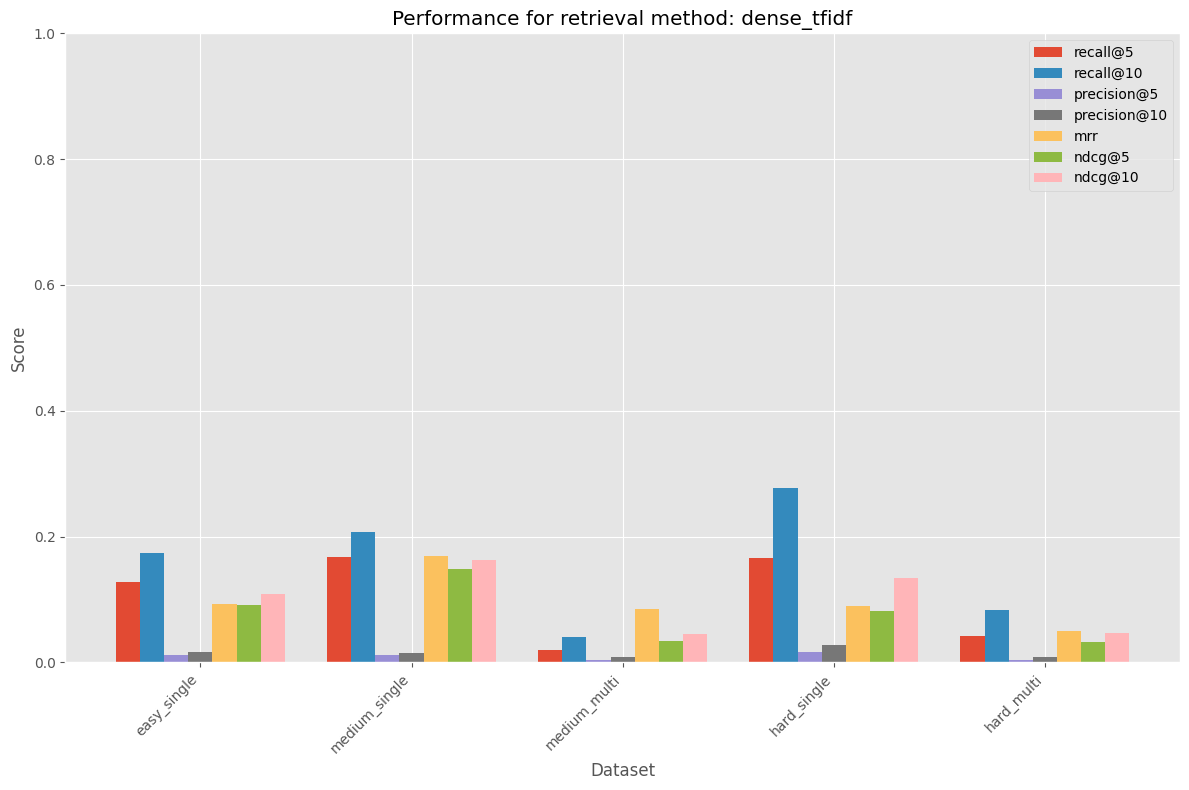

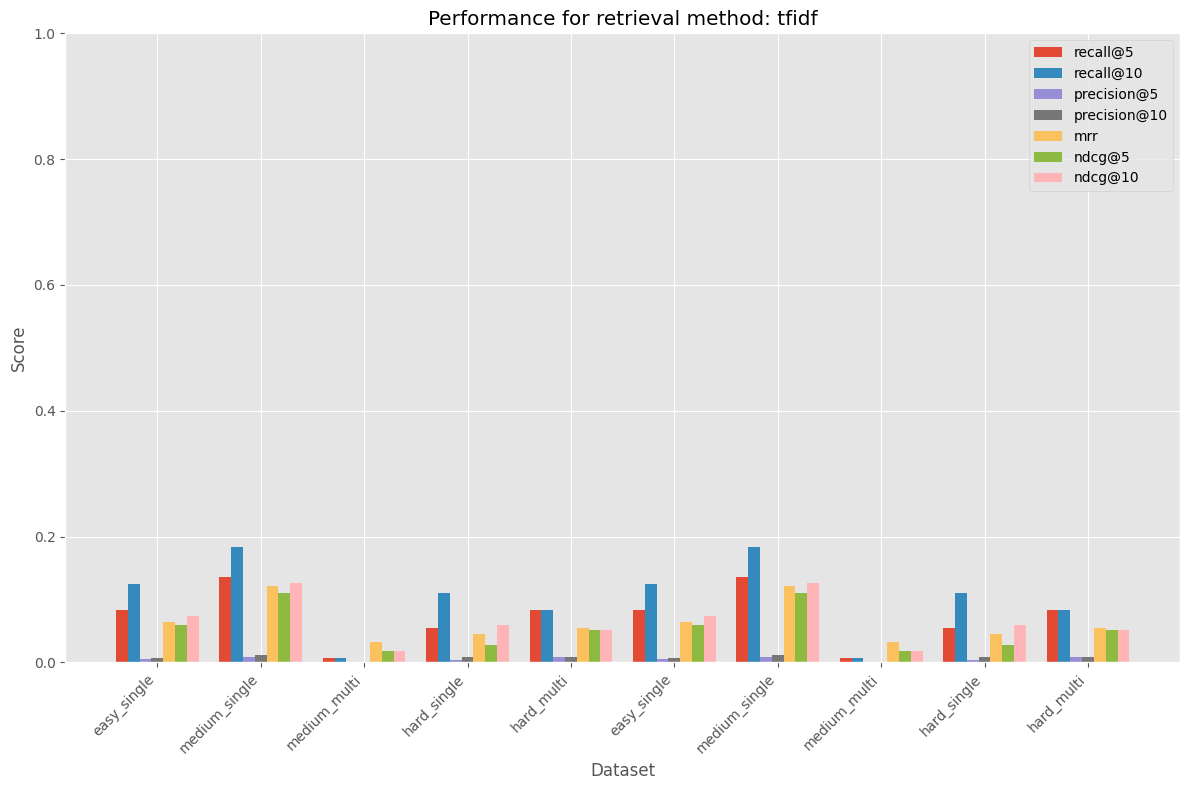

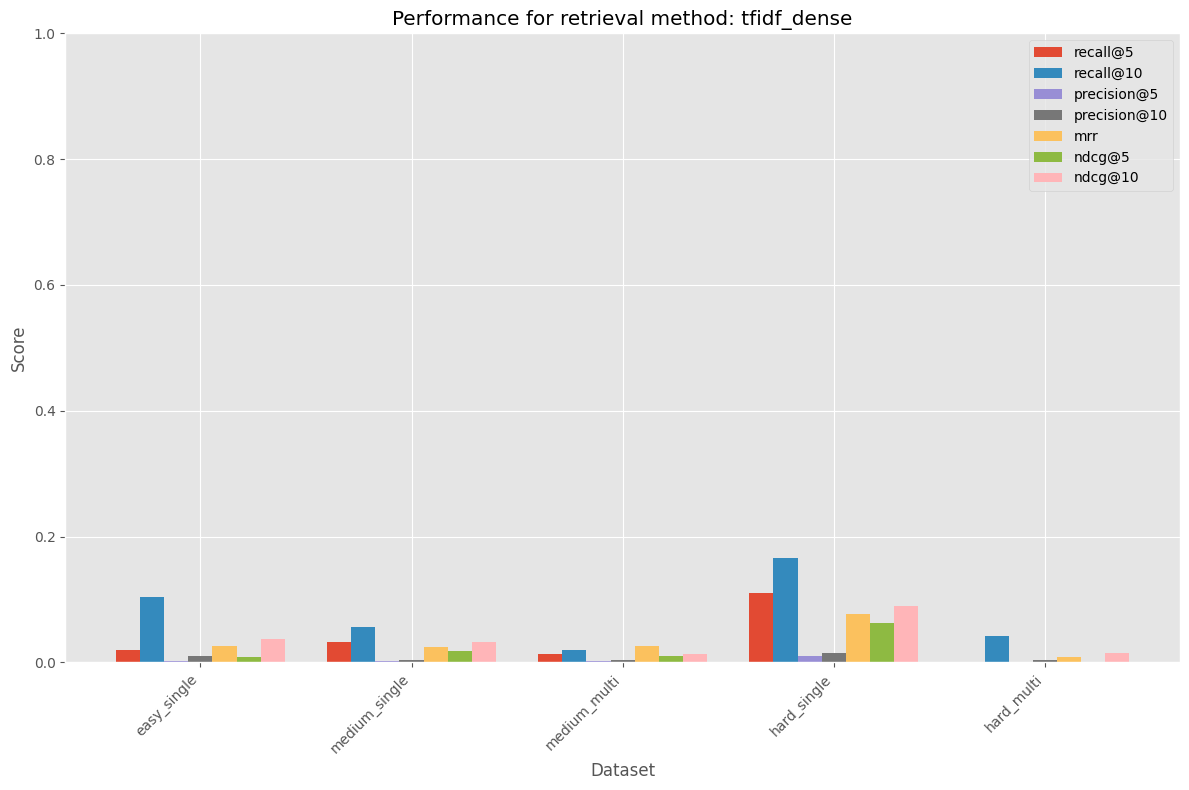

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Assume 'results' is your list of evaluation dictionaries, e.g.:
# results = [
#     {"data_set": "easy_single", "retrieval": "dense", "performance": {"recall@5": 0.0839, "precision@5": 0.01976, "mrr": 0.05455, "ndcg@5": 0.05913}},
#     {"data_set": "medium_single", "retrieval": "dense", "performance": {"recall@5": 0.136, "precision@5": 0.03736, "mrr": 0.11154, "ndcg@5": 0.11064}},
#     {"data_set": "medium_multi", "retrieval": "dense", "performance": {"recall@5": 0.00680, "precision@5": 0.00571, "mrr": 0.02857, "ndcg@5": 0.01752}},
#     {"data_set": "hard_single", "retrieval": "dense", "performance": {"recall@5": 0.2, "precision@5": 0.1, "mrr": 0.15, "ndcg@5": 0.12}},
#     {"data_set": "hard_multi", "retrieval": "dense", "performance": {"recall@5": 0.1, "precision@5": 0.05, "mrr": 0.08, "ndcg@5": 0.07}},
#     # Also results for other retrieval methods...
# ]

# Get the unique retrieval methods from the results.
unique_methods = sorted(list(set(r["retrieval"] for r in results)))

# Loop over each retrieval method.
for method in unique_methods:
    # Filter results for this method.
    method_results = [r for r in results if r["retrieval"] == method]
    # Extract dataset names.
    dataset_names = [r["data_set"] for r in method_results]
    # Assume all items have the same metric keys; extract from the first.
    metrics = list(method_results[0]["performance"].keys())
    
    n_datasets = len(dataset_names)
    n_metrics = len(metrics)
    indices = np.arange(n_datasets)
    # We'll use a total group width of 0.8.
    bar_width = 0.8 / n_metrics

    plt.style.use('ggplot')
    plt.figure(figsize=(12, 8))
    
    # Plot each metric as a separate bar within each dataset group.
    for i, metric in enumerate(metrics):
        # Compute positions with an offset for each metric.
        positions = indices - 0.4 + i * bar_width + bar_width / 2
        metric_values = [r["performance"][metric] for r in method_results]
        plt.bar(positions, metric_values, width=bar_width, label=metric)
    
    # Center x-ticks under each dataset group.
    plt.xticks(indices, dataset_names, rotation=45, ha='right')
    plt.title(f"Performance for retrieval method: {method}")
    plt.xlabel("Dataset")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()


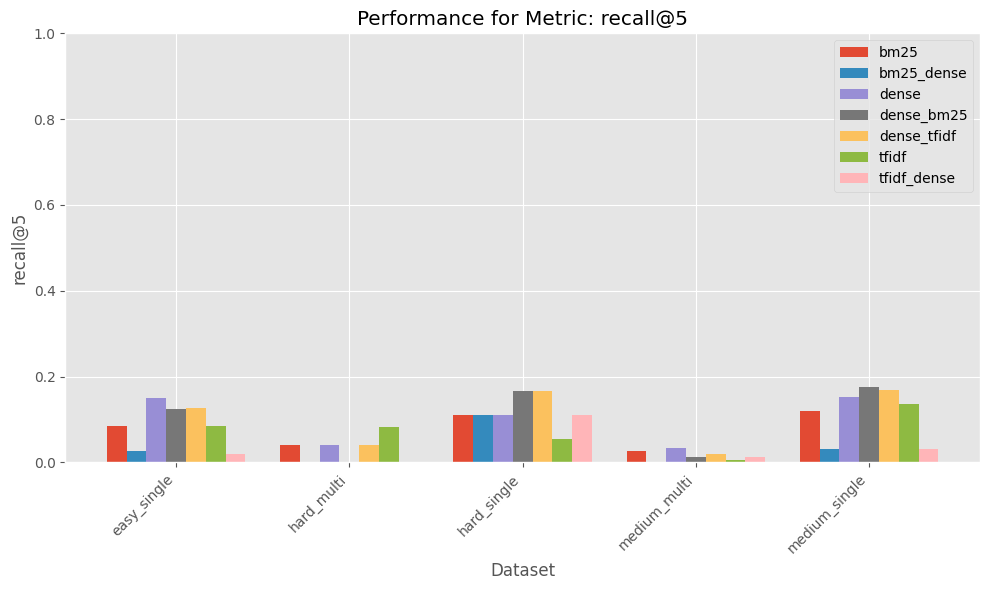

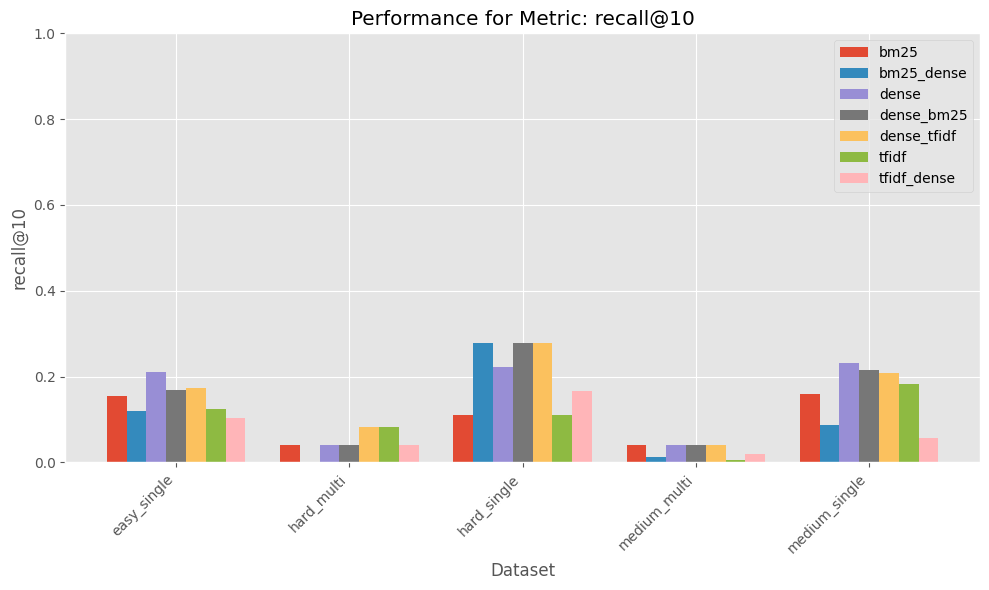

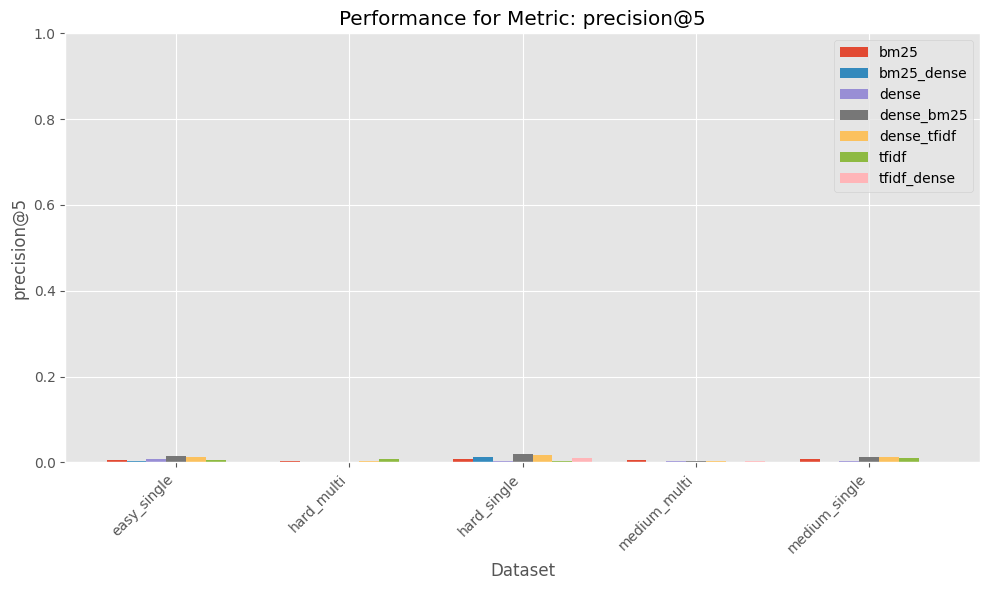

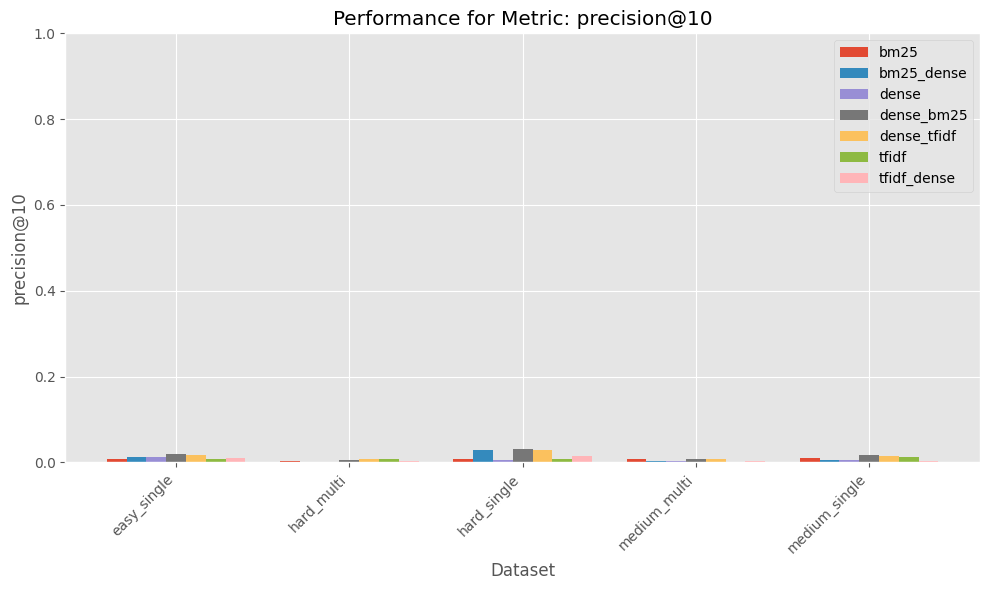

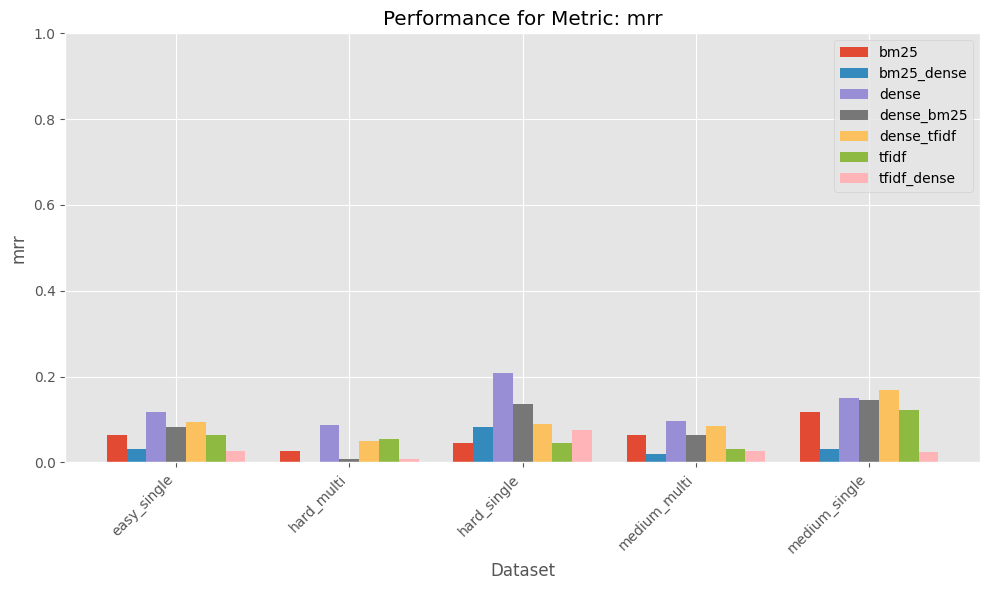

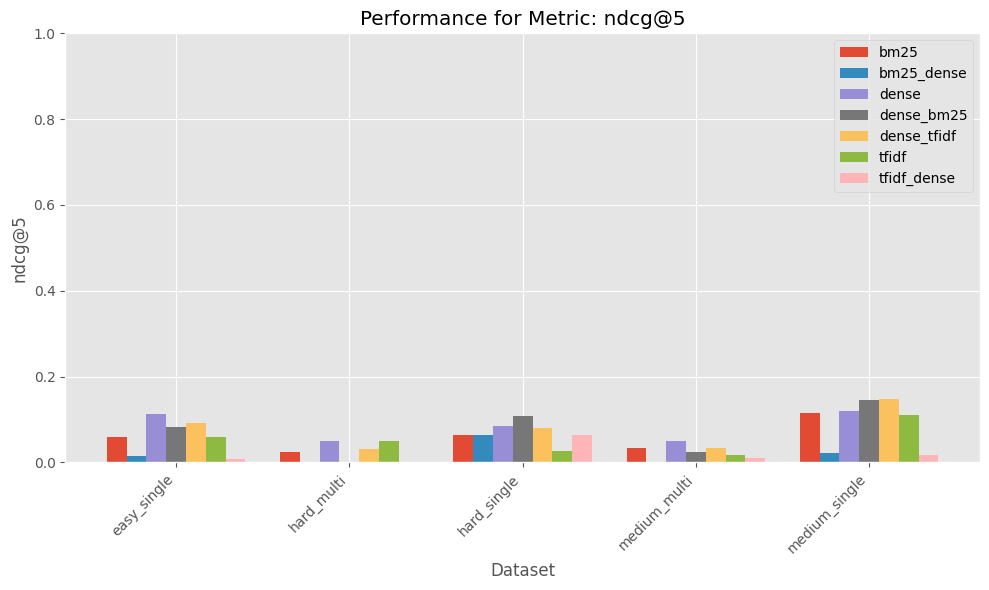

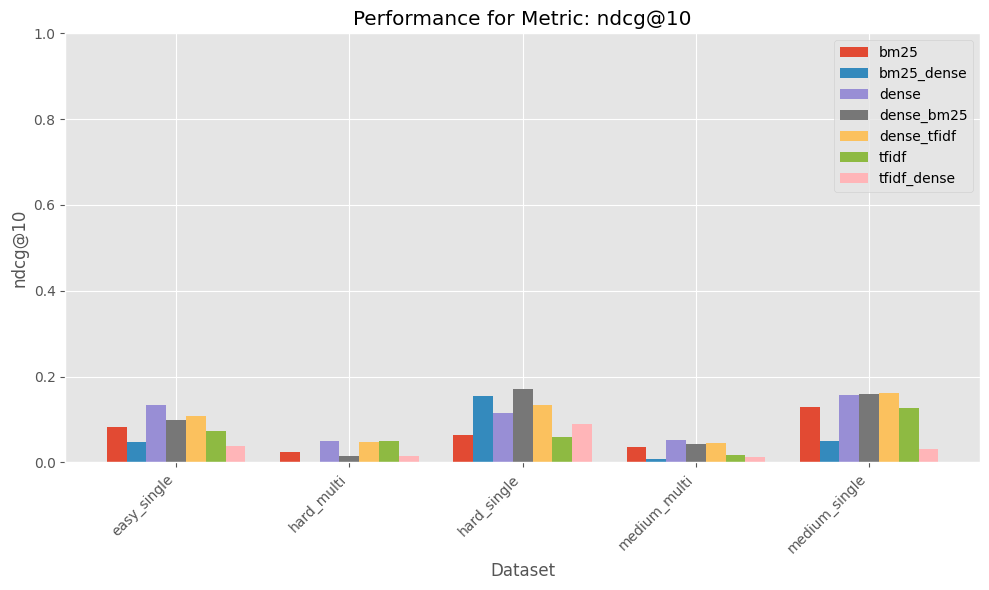

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Assume 'results' is your list of evaluation dictionaries with structure like:
# {
#     "data_set": "easy_single",
#     "retrieval": "dense",
#     "performance": {
#         "recall@5": 0.0839,
#         "precision@5": 0.01976,
#         "mrr": 0.05455,
#         "ndcg@5": 0.05913
#     }
# }
# Replace 'results' below with your actual results list.

# Extract unique metrics from the first result's performance.
metrics = list(results[0]["performance"].keys())

# Get the unique dataset names.
dataset_names = sorted(list(set(r["data_set"] for r in results)))
# Get the unique retrieval methods.
retrieval_methods = sorted(list(set(r["retrieval"] for r in results)))

for metric in metrics:
    n_datasets = len(dataset_names)
    n_methods = len(retrieval_methods)
    indices = np.arange(n_datasets)
    # We'll allocate a total group width of 0.8 for each dataset.
    bar_width = 0.8 / n_methods

    plt.figure(figsize=(10, 6))
    for i, method in enumerate(retrieval_methods):
        values = []
        # For each dataset, get the performance value for the current retrieval method.
        for ds in dataset_names:
            # Filter results for this dataset and retrieval method.
            filtered = [r for r in results if r["data_set"] == ds and r["retrieval"] == method]
            if filtered:
                values.append(filtered[0]["performance"][metric])
            else:
                values.append(0)
        # Compute positions with an offset for each method.
        positions = indices - 0.4 + i * bar_width + bar_width / 2
        plt.bar(positions, values, width=bar_width, label=method)
    
    plt.xticks(indices, dataset_names, rotation=45, ha='right')
    plt.title(f"Performance for Metric: {metric}")
    plt.xlabel("Dataset")
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.legend()
    plt.tight_layout()
    plt.show()


C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_57256\3832569985.py:59: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


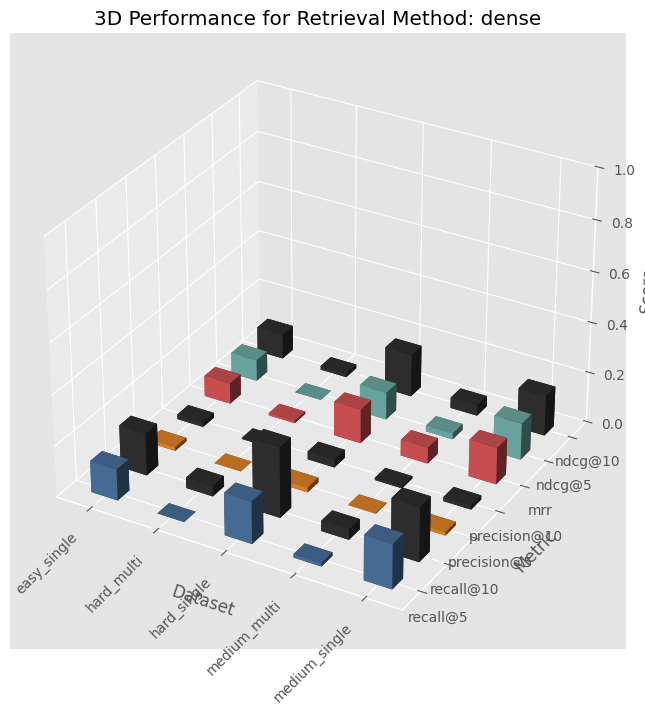

In [4]:
# Get unique datasets and metric names.
unique_datasets = sorted(list(set(r["data_set"] for r in results)))
metrics = list(results[0]["performance"].keys())

# Define a color mapping for metrics.
metric_color_dict = {
    "recall@5": "#4E79A7",
    "precision@5": "#F28E2B",
    "mrr": "#E15759",
    "ndcg@5": "#76B7B2"
}

# For simplicity, here we assume all results are from the same retrieval method.
method = results[2]["retrieval"]

# Build a dictionary mapping each dataset to its performance for each metric.
performance = {ds: {m: 0 for m in metrics} for ds in unique_datasets}
for r in results:
    ds = r["data_set"]
    for m in metrics:
        performance[ds][m] = r["performance"].get(m, 0)

# Prepare data arrays for the 3D plot.
xpos, ypos, zpos, colors = [], [], [], []
for i, ds in enumerate(unique_datasets):
    for j, m in enumerate(metrics):
        xpos.append(i)
        ypos.append(j)
        zpos.append(performance[ds][m])
        colors.append(metric_color_dict.get(m, "#333333"))

xpos = np.array(xpos)
ypos = np.array(ypos)
zpos = np.array(zpos)

# Bar dimensions.
dx = 0.4  # width in x-direction (datasets)
dy = 0.4  # width in y-direction (metrics)

# Create 3D bar plot.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(xpos, ypos, np.zeros_like(zpos), dx, dy, zpos, color=colors, shade=True)

# Set x-ticks for datasets.
ax.set_xticks(np.arange(len(unique_datasets)) + dx/2)
ax.set_xticklabels(unique_datasets, rotation=45, ha='right')
# Set y-ticks for metrics.
ax.set_yticks(np.arange(len(metrics)) + dy/2)
ax.set_yticklabels(metrics)

ax.set_zlim(0, 1)
ax.set_xlabel("Dataset")
ax.set_ylabel("Metric")
ax.set_zlabel("Score")
ax.set_title(f"3D Performance for Retrieval Method: {method}")

plt.tight_layout()
plt.show()